In [1]:
import numpy as np
from sklearn import datasets
import pandas as pd
import math

In [2]:
def y_countss(y):
    q=y.unique()  # the unique values in Play Golf
    count=q.size  # counting the number of unique values
    for i in range(count):
        m=q[i]  # using unique values of y one by one to find their total occurrences
        p=y[y==m].count()  # finding the occurrences
        print("Count of {} = {}".format(m,p))

In [3]:
def get(x,y,cn):
    combine=x.copy()
    combine=pd.DataFrame(combine) #converting it into Dataframe since x is series
    combine["new"]=y #combining the x feature and y
    q=x.unique() #number of unique elements in x array
    count=q.size #count the number of unique elements in x array
    tot=0
    D=x.count()# to count the total number of rows 
    
    for i in range(count):
        m=q[i] #fetching the unique elements one by one
        
        p=combine[combine[cn]==m]  # forming dataframe of the unique elements
        occur=p.count()[0] #occurrence of the unique elements
        tot=tot+(occur/D)*info_org(p["new"]) # finding the info gain
        
    return tot

In [4]:
def split(x,y,column_names,i1,level):
    cn=column_names.copy()  #  taking of copy of column names since original copy is to be retained
    combined=x.copy()    # taking a copy of x
    combined["Play Golf"]=y # combining the x and y
    q=x.iloc[:,i1].unique() # unique elements in x array
    count=q.size   #number of unique elements in x array
    
    p=cn[i1]  # the feature on which split will be made
    w="Play Golf"
    level+=1   # increasing the level by 1 to indicate the depth
    print("Splitting on Feature {}".format(p),end="\n\n")
    del cn[i1]  #deleting the feature name on which split will be made
    for i in range(count):
        m=q[i]  #fetching the unique elements one by one
        form=combined[combined[p]==m]   #making the required splits
        #print(form)        
        del form[p]  # deleting the feature row on which the split is made

        y=form[w]  # extracting Play Golf 
        del form[w]  #deleting   Play Golf from form

        find(form,y,cn,level)   #calling find
        
    

In [5]:
def info_org(y):
    
    tot=0
    q=y.unique() # to form an array of all unique elements in y
    
    count=q.size # to count the number of unique elements in y
    
    n=np.zeros(count) # creating an numpy array of 0s to count the occurrence of each unique values
    for i in range(count):
        m=q[i] # taking the unique values y one by one
        n[i]=y[y==m].count() # counting the occurrence of each unique element and storing in array n
    
    for i in range(count):
        tot+=-(n[i]/n.sum())*math.log2(n[i]/n.sum()) # finding the info org
    return tot
    

In [6]:
def find(X,Y,column_names,level):
    
    print("Level {}".format(level))
    
    inf=info_org(Y) # to find info_orginal of node
    
    p=X.shape[1] # finding the number of features
    #print(X)
    y_countss(Y)  # counting the number of yes and no
    
    print("Current Entropy is {}".format(inf))
    if(inf==0 or p==1):
        print("Reached leaf Node",end="\n\n")
        return
    
    
    #print(Y)
    max=-99999
    i1=-1
    for i in range (p):
        cn=column_names[i]  #using column names one by one to check info gain
        #print(cn)
        v= inf-get(X.iloc[:,i],Y,cn) #sending the feature one by one in get() and finding the info gain
        if v>max:
            max=v
            i1=i
    print("Information Gain = {}".format(max))

    split(X,Y,column_names,i1,level)
    
    

In [7]:
column_names=["Outlook","Temp","Humidity","Windy","Play Golf","Unnamed: 5"]
df=pd.read_csv("Golf.csv",names=column_names)
del df["Unnamed: 5"]
del column_names[5]
X=df.iloc[:,:4]
Y=df.iloc[:,4]
level=0
df

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [8]:
find(X,Y,column_names,level)

Level 0
Count of No = 5
Count of Yes = 9
Current Entropy is 0.9402859586706309
Information Gain = 0.2467498197744391
Splitting on Feature Outlook

Level 1
Count of No = 3
Count of Yes = 2
Current Entropy is 0.9709505944546686
Information Gain = 0.9709505944546686
Splitting on Feature Humidity

Level 2
Count of No = 3
Current Entropy is 0.0
Reached leaf Node

Level 2
Count of Yes = 2
Current Entropy is 0.0
Reached leaf Node

Level 1
Count of Yes = 4
Current Entropy is 0.0
Reached leaf Node

Level 1
Count of Yes = 3
Count of No = 2
Current Entropy is 0.9709505944546686
Information Gain = 0.9709505944546686
Splitting on Feature Windy

Level 2
Count of Yes = 3
Current Entropy is 0.0
Reached leaf Node

Level 2
Count of No = 2
Current Entropy is 0.0
Reached leaf Node



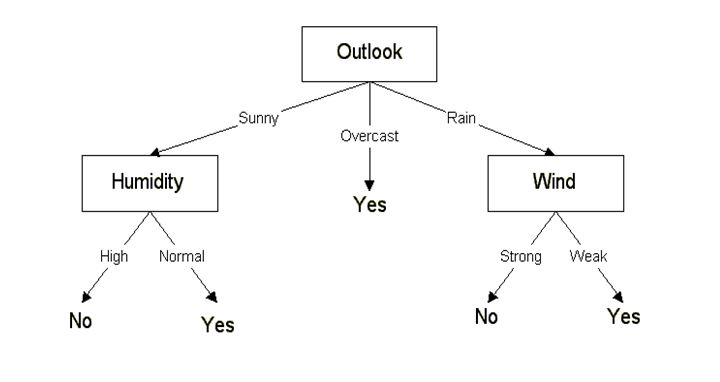

In [9]:
from IPython.display import Image
Image("treee.jpg",height=1000,width=1000)